<h1><center>Can a Mobile Game's Rating be Defined at its Launch?</center></h1>
<h4><center>Using Machine Learning to Predict Strategy Mobile Games Ratings </center></h4>
<h4><center>MSIN0097 Individual Coursework</center></h4>

## Table of Contents

* [Chapter 1](#chapter1): Introduction
    * [Section 1.1](#section_1_1): Problem Framing
    * [Section 1.2](#section_1_2): Getting-the-Data
* [Chapter 2](#chapter2): Exploring the Data
* [Chapter 3](#chapter3): Data Preparation
    * [Section 3.1](#section_3_1): Data Cleaning pt.1
    * [Section 3.2](#section_3_2): Data Cleaning pt.2
    * [Section 3.3](#section_3_3): Feature Engineering
* [Chapter 4](#chapter4): Data Visualization
* [Chapter 5](#chapter5): Shortlisting Promising Models
    * [Section 5.1](#section_5_1): Data Preparation
        * [Section 5.1.1](#section_5_1_1): Handling Text and Categorical Features
        * [Section 5.1.2](#section_5_1_2): Feature Scaling
    * [Section 5.2](#section_5_2): Splitting the Data
    * [Section 5.3](#section_5_3): Models Traning and Validation
* [Chapter 6](#chapter6): Fine-tuning the model
    * [Section 6.1](#section_6_1): Grid Search Cross-Validation
    * [Section 6.2](#section_6_2): Ensemble Method
* [Chapter 7](#chapter7): Final Solution and Summary Conclusions

Word count:

## Chapter 1: <a class="anchor" id="chapter1"></a> Introduction

In [5]:
# Importing libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import missingno as msno
import re
import squarify
import plotly.express as px
from sklearn.model_selection import train_test_split
#from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

### 1.1: <a class="anchor" id="section_1_1"></a> Problem Framing

In 2021, the mobile gaming industry accounted for 52% of the the global market. While PC and console gaming industries are seeing drops in their revenue, mobile gaming has seen an increase of 7.3% in revenue, representing 93.2b dollars in 2021's Global Game Market (Kaser, 2021).

Our data comes from a Kaggle dataset called "17k Mobile Strategy Games", containing information pulled in 2019 about 17007 strategy-based applications found on the Apple App Store.

We will first download the data (24MB) and import it into a pandas dataframe for a clearer understanding of our sample data.

## 1.2: <a class="anchor" id="section_1_2"></a> Getting the Data

In [7]:
games = pd.read_csv('appstore_games.csv')

In [8]:
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


# Chapter 2: <a class="anchor" id="chapter2"></a> Exploring the Data

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

We can see that several columns (13) are of the object datatype, which is the default datatype for strings. Some cleaning and reformatting will be necessary if we decide to use them to create and train our machine learning models.

In [10]:
print("Number of rows: ", games.shape[0])
print("Number of columns: ", games.shape[1])

Number of rows:  17007
Number of columns:  18


In [11]:
games.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


Only a couple of the data's columns can be used for statistical computations.

Our target attribute, the average user rating has a mean of 4 stars out of 5, which is pretty high. It is possible our predictions will give a rating around 4 stars as well.

An interesting point is that we can see that at least 75% of the games are free, but what is the exact proportion? We will later use data visualization to have the precise amount of free and paid for applications.

After exploring the data, the chosen target attribute we will be predicting in this report will be the "Average User Rating".

Apart from the gameplay, are there certain technical factors that tie the fate of a game's rating ? 

In [12]:
b = games["Primary Genre"].value_counts().sort_values(ascending=False)
b

Games                16286
Education              222
Entertainment          198
Utilities               77
Sports                  60
Reference               32
Stickers                29
Finance                 18
Business                16
Productivity            15
Lifestyle               10
Book                     9
Social Networking        9
News                     7
Health & Fitness         5
Food & Drink             4
Navigation               3
Music                    3
Medical                  2
Shopping                 1
Travel                   1
Name: Primary Genre, dtype: int64

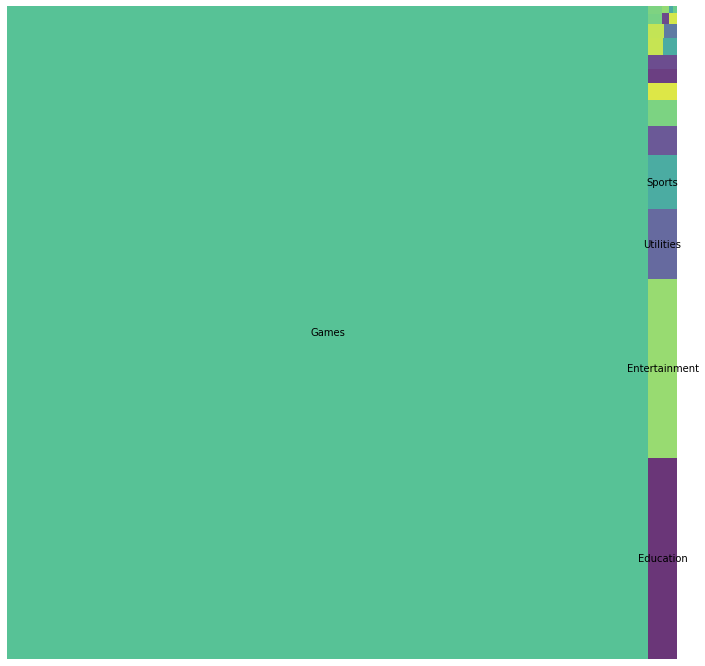

In [13]:
fig, ax = plt.subplots(1, figsize = (12,12))
squarify.plot(sizes=b,
              label=b.index[:5], 
              alpha=.8 )
plt.axis('off')
plt.show()

Although the title of the dataset is "17k Mobile Strattegy Games", this treemap and list demonstrates that there are many non-gaming applications in this dataset.
As we are only interested in predicting games ratings, we will later discard the remaining apps belonging to the other categories.

We also have the URLs of the applications icons, which can be very useful to instantly understand the type and style of the game. These URLs could be used in classification using convolutional neural networks, however we will not use this feature in the scope of this analysis.

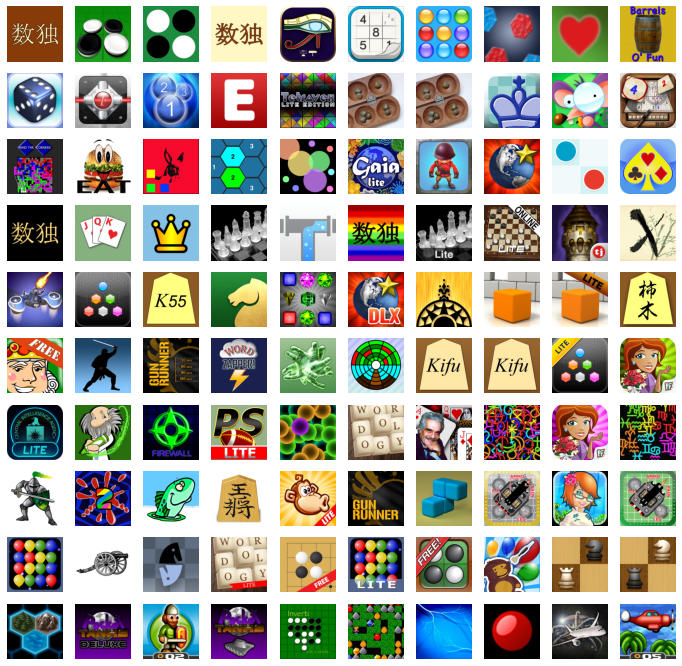

In [14]:
import requests
from PIL import Image
from io import BytesIO

fig,ax = plt.subplots(10,10, figsize = (12,12))

for i in range(100):
    r = requests.get(games['Icon URL'][i])
    image = Image.open(BytesIO(r.content))
    ax[i//10][i%10].imshow(image)
    ax[i//10][i%10].axis('off')
plt.show()

This preview of the applications icons reveals that there are some apps which are very similar, maybe even duplicates as their icons are exactly the same (not to be mixed with icons that contain slight differences like a game's full-version and demo version). We will later check for duplicates and handle them if necessary.

# Chapter 3: <a class="anchor" id="chapter3"></a> Data Preparation

## 3.1: <a class="anchor" id="section_3_1"></a> Data Cleaning pt.1

As our data requires thorough cleaning, we will start by:
    
* Drop features we do not need

* Deal with missing values

<font color='grey'>_Dropping unnecessary columns_</font>

In [15]:
# Dropping unnecessary columns
games = games.drop(["ID","Icon URL","URL", "Subtitle", "Description"], axis=1)

In [16]:
# Making a table to check for any missing values
total = games.isnull().sum().sort_values(ascending=False)
percent = (total/games.isnull().count()).sort_values(ascending=False)*100
dtype = games.dtypes
na_table = pd.concat([total,percent,dtype], axis=1, keys=['Total', '%', 'Dtype'])
na_table

,Total,%,Dtype
Average User Rating,9446,55.541836,float64
User Rating Count,9446,55.541836,float64
In-app Purchases,9324,54.824484,object
Languages,60,0.352796,object
Price,24,0.141118,float64
Size,1,0.005880,float64
Name,0,0.000000,object
Developer,0,0.000000,object
Age Rating,0,0.000000,object
Primary Genre,0,0.000000,object


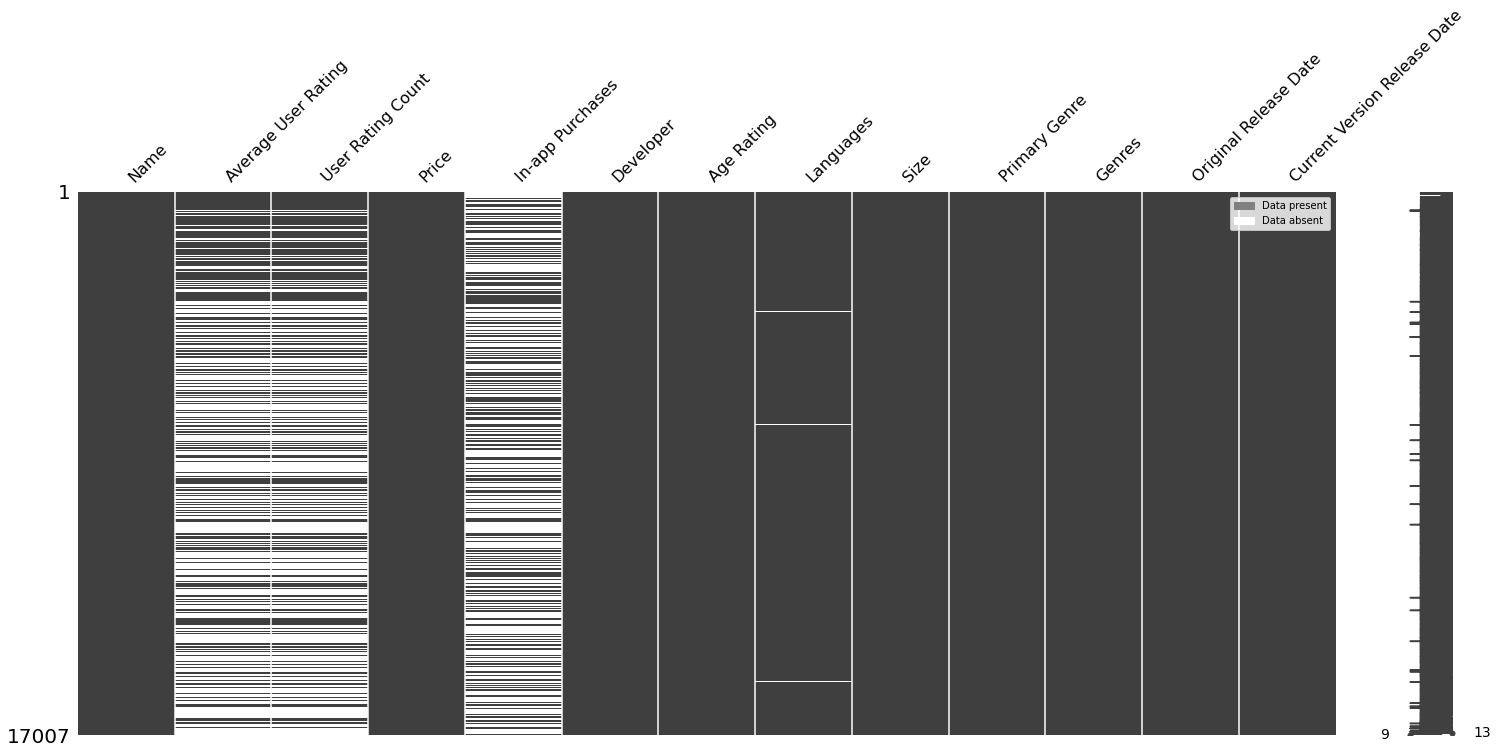

In [17]:
# Plotting the missing values distribution
msno.matrix(games)
gray_patch = mpatches.Patch(color='gray', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent ')
plt.legend(handles=[gray_patch, white_patch])

More than half of the data of our target attribute is missing, which is unfortunate but not problematic as a large amount of data will remain.

Apart from the usual mishaps causing some missing values in a dataset, the reason behind this large number is that the Apple App Store API used to collect this data does not count the ratings of applications that do not have at least 5 reviews as they can be easily faked.

In [18]:
# Dropping the rows with missing NAs in our rating columns
games = games.dropna(subset=["Average User Rating", "User Rating Count"])

In [19]:
games.isna().sum()

Name                               0
Average User Rating                0
User Rating Count                  0
Price                              0
In-app Purchases                2927
Developer                          0
Age Rating                         0
Languages                         24
Size                               0
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64

In [20]:
print(games["In-app Purchases"].dtype.name, games["Languages"].dtype.name)

object object


As the two remaining columns with missing data are not numerical, we cannot impute a median value. We will instead fill the missing values for in-app purchases with 0 and change the Language NAs to English as the default language.

In [21]:
games["Languages"] = games["Languages"].fillna("EN", axis=0)
games["In-app Purchases"] = games["In-app Purchases"].fillna(0, axis=0)

In [22]:
games.isna().sum()

Name                            0
Average User Rating             0
User Rating Count               0
Price                           0
In-app Purchases                0
Developer                       0
Age Rating                      0
Languages                       0
Size                            0
Primary Genre                   0
Genres                          0
Original Release Date           0
Current Version Release Date    0
dtype: int64

Our data is now fully clean of missing values. But as we saw previously by visualizing the applications icons, there might be several duplicated ones.

In [23]:
games.duplicated(subset="Name").sum()

73

We have 160 duplicated apps, which we will remove from our dataset.

In [24]:
games = games.drop_duplicates(subset="Name")

In [25]:
games.duplicated(subset="Name").sum()

0

In [26]:
# Taking a look at the new shape of the data
games.shape

(7488, 13)

## 3.2: <a class="anchor" id="section_3_2"></a> Data Cleaning pt.2

The second part of the cleaning process includes:

* convert size to megabytes

* convert dates in the right format

* convert genres

* fix languages

* fix age ratings

* reformat in-app purchases

* check for anomalies

<font color='grey'>_Converting app size to MB_</font>

In [27]:
games["Size"] = round(games["Size"]/1000000, 2)

In [28]:
# Confirming it is the right size
games["Size"].head(1)

0    15.85
Name: Size, dtype: float64

<font color='grey'>_Converting date columns to the datetime datatype_</font>

In [29]:
games["Original Release Date"]= pd.to_datetime(games["Original Release Date"])
games["Current Version Release Date"]= pd.to_datetime(games["Current Version Release Date"])

In [30]:
games.head(2)

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,Sudoku,4.0,3553.0,2.99,0,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15.85,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30
1,Reversi,3.5,284.0,1.99,0,Kiss The Machine,4+,EN,12.33,Games,"Games, Strategy, Board",2008-11-07,2018-05-17


<font color='grey'>_Converting the genres to integer format by counting them_</font>

In [31]:
games["Genres"] = games["Genres"].apply(lambda x: len(x.split(',')))

In [32]:
# Verifying the Genres column is numerical
games["Genres"].unique()

array([3, 4, 2, 6])

<font color='grey'>_Removing apps that are not games as seen with the treemap_</font>

In [33]:
games["Primary Genre"].unique()

array(['Games', 'Entertainment', 'Finance', 'Sports', 'Reference',
       'Medical', 'Education', 'Utilities', 'Book', 'Travel',
       'Productivity', 'News', 'Business', 'Social Networking',
       'Health & Fitness', 'Lifestyle', 'Music', 'Stickers', 'Shopping',
       'Food & Drink', 'Navigation'], dtype=object)

In [34]:
games["Primary Genre"].count()

7488

In [35]:
games = games[games["Primary Genre"] == 'Games']

In [36]:
games.shape

(7220, 13)

We now have 7290 rows instead of 7561, meaning that we have successfully removed the non-gaming apps.

In [37]:
# Converting the languages to integer format by counting them
games["Languages"] = games["Languages"].apply(lambda x: len(x.split(',')))

In [38]:
games.head(2)

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,Sudoku,4.0,3553.0,2.99,0,Mighty Mighty Good Games,4+,17,15.85,Games,3,2008-11-07,2017-05-30
1,Reversi,3.5,284.0,1.99,0,Kiss The Machine,4+,1,12.33,Games,3,2008-11-07,2018-05-17


In [39]:
# Converting the age rating to integer format
games["Age Rating"] = games["Age Rating"].apply(lambda x: re.sub('\+','',str(x)))

In [40]:
games["Age Rating"].head(2)

0    4
1    4
Name: Age Rating, dtype: object

In [41]:
games["In-app Purchases"] = games["In-app Purchases"].apply(lambda x:1 if x!= 0 else 0)

In [42]:
#Checking the in-app purchases column is binary
games["In-app Purchases"].unique()

array([0, 1])

In [43]:
games.describe()

,Average User Rating,User Rating Count,Price,In-app Purchases,Languages,Size,Genres
count,7220.000000,7.220000e+03,7220.000000,7220.000000,7220.000000,7220.000000,7220.000000
mean,4.067105,3.381009e+03,0.541881,0.619668,3.857064,154.066569,3.553601
std,0.743698,4.322591e+04,1.759528,0.485502,6.562417,258.973492,0.553829
min,1.000000,5.000000e+00,0.000000,0.000000,1.000000,0.290000,2.000000
25%,3.500000,1.300000e+01,0.000000,0.000000,1.000000,31.487500,3.000000
50%,4.500000,4.700000e+01,0.000000,1.000000,1.000000,81.780000,4.000000
75%,4.500000,3.210000e+02,0.000000,1.000000,3.000000,180.060000,4.000000
max,5.000000,3.032734e+06,59.990000,1.000000,111.000000,4005.590000,4.000000


<font color='grey'>_Fixing Anomalies_</font>

We previously saw that the maximum prize for a game was 179.99$\$$. It is now lower at 59.99$\$$, but still remains an unlikely price.

In [44]:
# Checking the new max value for Price
games["Price"].max()

59.99

There are numerous paid for games in the appstore, however a price of 59.99$\$$ seems a bit far-fetched. We will hence drop this row and continue identifying and dropping the app with the maximum price until we approach a reasonable price of around 20$\$$.

In [45]:
# Finding the game with a price of 59.99 dollars
games[games["Price"] == 59.99]

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
15031,GOTO Bridge 19,4.0,50.0,59.99,0,GOTO Games,4,2,422.57,Games,3,2018-10-13,2018-11-15


In [46]:
# Dropping the row with a price of $59.99
games=games.drop(15031)

In [47]:
# Checking the new max value for Price
games["Price"].max()

19.99

In [48]:
# Double checking with the describe table
games.describe()

,Average User Rating,User Rating Count,Price,In-app Purchases,Languages,Size,Genres
count,7219.000000,7.219000e+03,7219.000000,7219.000000,7219.000000,7219.000000,7219.000000
mean,4.067115,3.381470e+03,0.533646,0.619753,3.857321,154.029375,3.553678
std,0.743750,4.322888e+04,1.614522,0.485481,6.562835,258.972144,0.553829
min,1.000000,5.000000e+00,0.000000,0.000000,1.000000,0.290000,2.000000
25%,3.500000,1.300000e+01,0.000000,0.000000,1.000000,31.485000,3.000000
50%,4.500000,4.700000e+01,0.000000,1.000000,1.000000,81.770000,4.000000
75%,4.500000,3.210000e+02,0.000000,1.000000,3.000000,180.040000,4.000000
max,5.000000,3.032734e+06,19.990000,1.000000,111.000000,4005.590000,4.000000


## 3.3: <a class="anchor" id="section_3_3"></a> Feature Engineering


In this section, we will add columns and variables to the dataset that will be useful to running our algorithms.

In [49]:
# Adding a column indicating the number of years a game has been unsupported (not updated)
# We set the year to 2019 as this corresponds to owhen the data has been pulled
games[['Years Unsupported']] = 2019 - games['Current Version Release Date'].dt.year
games.loc[5:11, ['Name','Original Release Date', 'Current Version Release Date', 'Years Unsupported']]

,Name,Original Release Date,Current Version Release Date,Years Unsupported
5,Sudoku - Classic number puzzle,2008-07-30,2019-04-29,0
6,Gravitation,2008-07-30,2013-11-14,6
7,Colony,2008-03-08,2018-03-10,1
8,Carte,2008-03-08,2017-11-23,2
9,"""Barrels O' Fun""",2008-01-08,2008-01-08,11
11,Lumen Lite,2008-08-18,2008-11-22,11


In [50]:
# Making a list containing binary variables if the game is free-to-play or not
free= [x for x in zip(games['Price'], games['In-app Purchases'])]
free2 = []
for x,y in free:
    if x == 0.0 and y == 0:
        free2.append(1)
    else:
        free2.append(0)

In [51]:
# Adding the free to play column
games["Entirely Free"] = free2

In [52]:
# rearrange columns
games = games[['Name','Average User Rating','User Rating Count', 'Price', 'In-app Purchases', 'Entirely Free', 'Developer', 'Age Rating', 'Languages', 'Size', 'Genres', 'Original Release Date', 'Current Version Release Date', 'Years Unsupported']]

In [53]:
games.head(2)

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Entirely Free,Developer,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date,Years Unsupported
0,Sudoku,4.0,3553.0,2.99,0,0,Mighty Mighty Good Games,4,17,15.85,3,2008-11-07,2017-05-30,2
1,Reversi,3.5,284.0,1.99,0,0,Kiss The Machine,4,1,12.33,3,2008-11-07,2018-05-17,1


In [54]:
games.reset_index(drop=True)

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Entirely Free,Developer,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date,Years Unsupported
0,Sudoku,4.0,3553.0,2.99,0,0,Mighty Mighty Good Games,4,17,15.85,3,2008-11-07,2017-05-30,2
1,Reversi,3.5,284.0,1.99,0,0,Kiss The Machine,4,1,12.33,3,2008-11-07,2018-05-17,1
2,Morocco,3.0,8376.0,0.00,0,1,Bayou Games,4,1,0.67,3,2008-11-07,2017-05-09,2
3,Sudoku (Free),3.5,190394.0,0.00,0,1,Mighty Mighty Good Games,4,17,21.55,3,2008-07-23,2017-05-30,2
4,Senet Deluxe,3.5,28.0,2.99,0,0,RoGame Software,4,15,34.69,4,2008-07-18,2018-07-22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7214,Die Last,3.0,6.0,0.00,0,1,Jie Yang,12,2,151.31,4,2019-07-31,2019-07-31,0
7215,Basic Slosh,5.0,30.0,0.00,0,1,Ashnell Marchand,4,1,79.65,4,2019-07-23,2019-07-23,0
7216,Idle Racing Tycoon,5.0,51.0,0.00,0,1,Carson Brody,9,1,125.35,3,2019-07-31,2019-07-31,0
7217,Glow Hockey Strike,5.0,5.0,0.00,0,1,Samir Jabeur,4,1,128.69,3,2019-07-28,2019-07-28,0


# Chapter 4: <a class="anchor" id="chapter4"></a> Data Visualization

In this part, we will use our cleaned data to perform some visualization on our different features and identify which ones would be interesting to include in our Machine Learning models.

In [447]:
games_colors_hex=['#50d296','#90ee90','#ffe140','#fff760']

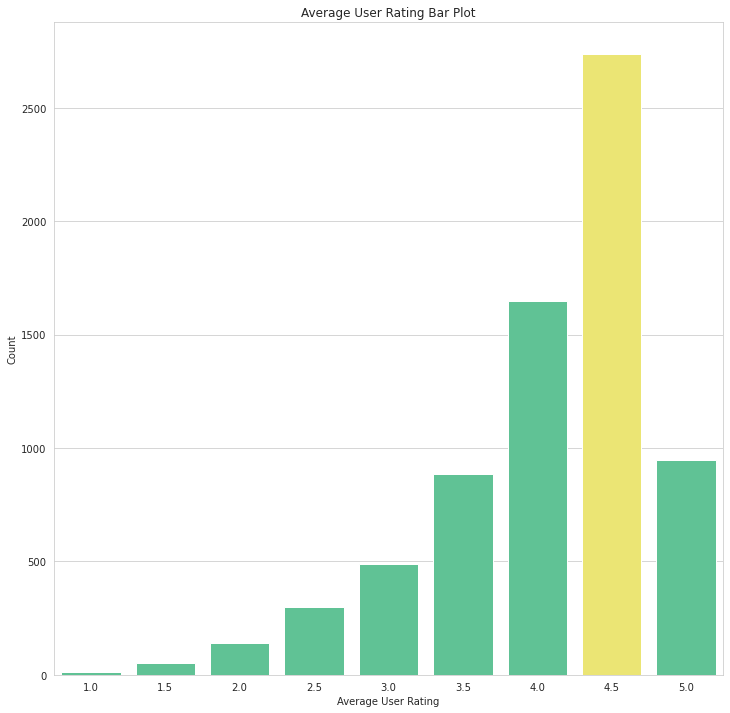

In [450]:
plt.figure(figsize = (12,12))
sns.barplot(x = games['Average User Rating'].value_counts().index,
           y= games['Average User Rating'].value_counts().values,
            palette=['#50d296','#50d296','#50d296',
                     '#50d296','#50d296','#50d296',
                     '#50d296','#fff760'])
plt.xlabel('Average User Rating')
plt.ylabel('Count')
plt.title('Average User Rating Bar Plot')
plt.show()

This is our target variable. We see that there is a density at 4.5, indicating a majority of positive ratings on strategy apps.

<AxesSubplot:xlabel='Average User Rating', ylabel='Price'>

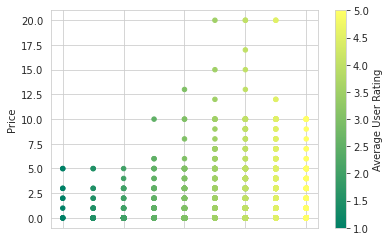

In [409]:
games.plot.scatter(x="Average User Rating", y="Price", c=1, cmap='summer')

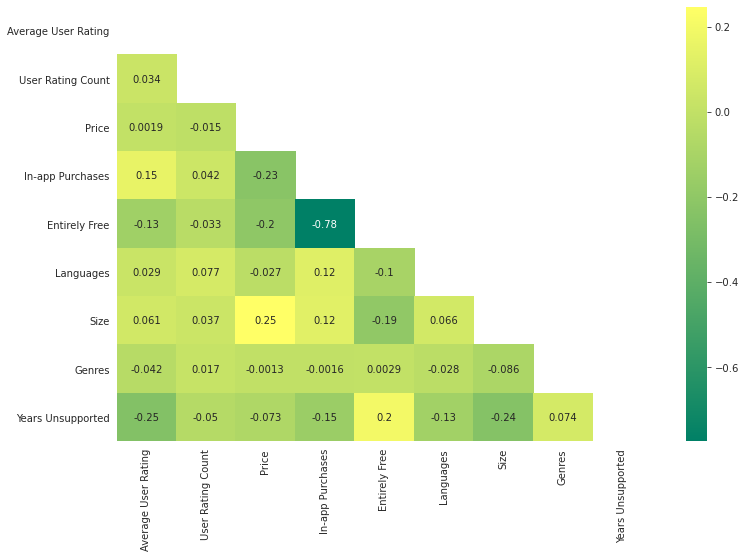

In [408]:
# Plotting a heatmap of the correlation between features
plt.figure(figsize=(12,8))
matrixx = np.triu(games.corr())
sns.heatmap(games.corr(), mask=matrixx, annot=True, cmap='summer')
plt.show();

Although there is no strong correlation, the matrix indicates a positive correlation between price and size. We can deduce that by investing more in a game and creating better graphics, the size of an app incrases consequently. We also observe a negative correlation between price and in-app purchases, which is logical as in-app purchases are nearly always only found in free-to-play apps (making it a "freemium" app, free to install but purchasing stuff inside the app makes the experience more enjoyable).

In [58]:
a = games.groupby("Entirely Free")["Entirely Free"].count().to_numpy()

In [59]:
# Creating a variable for the proportion of free-to-play games
a_Free = a[0]/a.sum() * 100

# Creating a variable for the proportion of pay-to-play games
a_Pay = a[1]/a.sum() * 100

In [60]:
print("Proportion for Free-to-play games is: {:.2f}".format(round(a_Free, 2)) + "%")
print("Proportion for Pay-to-play games is: {:.2f}".format(round(a_Pay, 2)) + "%")

Proportion for Free-to-play games is: 73.06%
Proportion for Pay-to-play games is: 26.94%


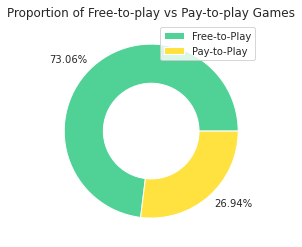

In [452]:
labels_2 = ["Free-to-Play","Pay-to-Play"]

#Creating a donut chart
plt.pie(a, labels=["73.06%", "26.94%"], colors=['#50d296','#ffe140'])

centre_circle = plt.Circle((0, 0), 0.55, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.title('Proportion of Free-to-play vs Pay-to-play Games')
plt.legend(labels_2)

plt.show()

This donut chart confirms that nearly 3/4 of games are free to play, a measure that might show itself important when predicting our target variable as a free game normally receives way more attention than a paid game and so brings bias to the comparison.

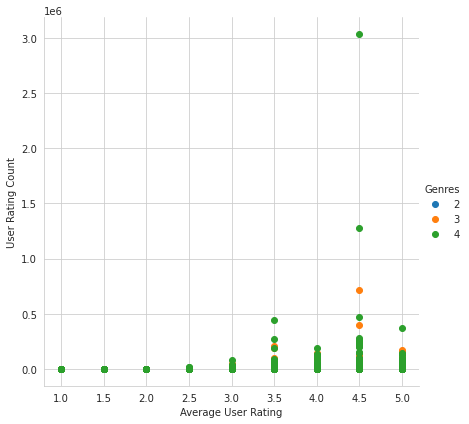

In [420]:
sns.set_style("whitegrid")
sns.FacetGrid(games, hue="Genres", height=6) \
   .map(plt.scatter, "Average User Rating", "User Rating Count") \
   .add_legend()
plt.show()

This is a scatter plot on our target variable with the number of secondary genres listed per games. We can see a clear domination of games with at least 4, as we can deduce that games with more genres are more listed, more visiible to users and so gather more reviews.

In [64]:
top = games.sort_values(by='User Rating Count', ascending=False)[['Name', 'Price', 'Average User Rating', 'Size', 'Developer', 'User Rating Count']].head(10)
top.iloc[:]

,Name,Price,Average User Rating,Size,Developer,User Rating Count
1378,Clash of Clans,0.0,4.5,161.22,Supercell,3032734.0
7187,Clash Royale,0.0,4.5,145.11,Supercell,1277095.0
13414,PUBG MOBILE,0.0,4.5,2384.08,Tencent Mobile International Limited,711409.0
1921,Plants vs. Zombies\u2122 2,0.0,4.5,120.76,PopCap,469562.0
8139,Pok\xe9mon GO,0.0,3.5,281.52,"Niantic, Inc.",439776.0
2410,Boom Beach,0.0,4.5,202.79,Supercell,400787.0
12473,"Cash, Inc. Fame & Fortune Game",0.0,5.0,245.96,Lion Studios,374772.0
8632,Idle Miner Tycoon: Cash Empire,0.0,4.5,443.97,Kolibri Games GmbH,283035.0
38,TapDefense,0.0,3.5,7.77,TapJoy,273687.0
3550,Star Wars\u2122: Commander,0.0,4.5,123.08,NaturalMotion,259030.0


Here is a table of the top games with the most ratings. We now know that the game that we saw at the top of the previous scatter plot is the popular strategy game "Clash of Clans" developed by Supercell. We can clearly see a domination of Supercell on this dataset as 3 of their games are in the table, with very good reviews overall (4.5 out of 5 for each game).

[Text(0.5, 1.0, 'User Rating Count VS Years Unsupported'),
 Text(0.5, 0, 'Years Unsupported'),
 Text(0, 0.5, 'User Rating Count')]

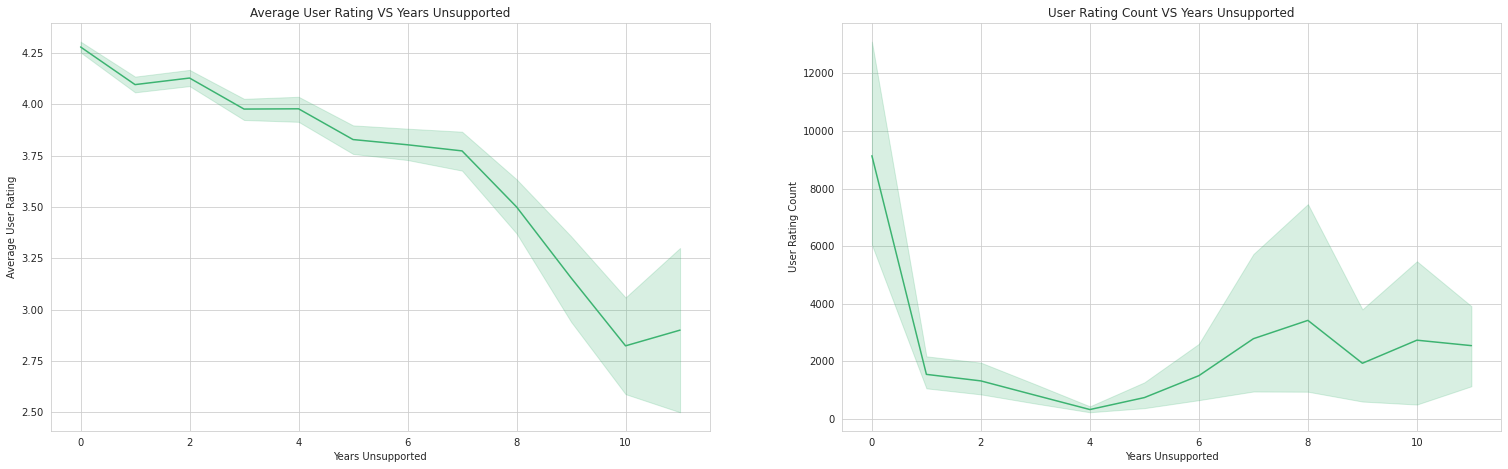

In [436]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 7.5))

sns.lineplot(x = "Years Unsupported", y = "Average User Rating", data = games,
             ax=ax1, color='mediumseagreen')
ax1.set(title = 'Average User Rating VS Years Unsupported', xlabel = 'Years Unsupported', ylabel = 'Average User Rating')

sns.lineplot(x = "Years Unsupported", y = "User Rating Count", data = games, ax=ax2, color='mediumseagreen')
ax2.set(title = 'User Rating Count VS Years Unsupported', xlabel = 'Years Unsupported', ylabel = 'User Rating Count')

These graphs represent the evolution of user rating and rating count in relation to our created feature of years unsupported (years between the launch and 2019 where no update has been made on the game). We can observe how important regular updates are even after the launch, as in both graphs the increase of unsupported years drastically reduce review's scores and counts.

In [70]:
d = games["Age Rating"].value_counts().sort_values(ascending=False)
d

4     4231
9     1437
12    1283
17     268
Name: Age Rating, dtype: int64

In [71]:
dic_age = {}
for i in games["Age Rating"].unique():
    dic_age[i] = len(games[games["Age Rating"] == i])

In [72]:
dic_age

{'4': 4231, '9': 1437, '12': 1283, '17': 268}

In [ ]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=40, 
    values= dic_age,
    labels=["{0} ({1})".format(k, v) for k, v in dic_age.items()],
    figsize=(12, 8),
    legend={'bbox_to_anchor': (0.5, 0.5)}    
)

In [1]:
# Data to plot
labels = []
sizes = []

for x, y in dic_age.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels, explode=[0.01,0,0,0], colors=games_colors_hex,autopct='%1.1f%%)

plt.axis('equal')
plt.show()

NameError: name 'dic_age' is not defined

Finally, we performed a pie chart on the age rating colmun. A vast majority of games are rated age 4 which is the lowest rating although they are strategy games, so that they further accessible and gain more downloads.

# Chapter 5: <a class="anchor" id="chapter5"></a> Shortlisting Promising Models

## 5.1: <a class="anchor" id="section_5_1"></a> Data Preparation

In [454]:
games.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Entirely Free,Developer,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date,Years Unsupported
0,Sudoku,4.0,3553.0,2.99,0,0,Mighty Mighty Good Games,4,17,15.85,3,2008-11-07,2017-05-30,2
1,Reversi,3.5,284.0,1.99,0,0,Kiss The Machine,4,1,12.33,3,2008-11-07,2018-05-17,1
2,Morocco,3.0,8376.0,0.00,0,1,Bayou Games,4,1,0.67,3,2008-11-07,2017-05-09,2
3,Sudoku (Free),3.5,190394.0,0.00,0,1,Mighty Mighty Good Games,4,17,21.55,3,2008-07-23,2017-05-30,2
4,Senet Deluxe,3.5,28.0,2.99,0,0,RoGame Software,4,15,34.69,4,2008-07-18,2018-07-22,1


The model preparation step makes the data fit to run through machine learning algorithms by different means such as labeling, encoding and scaling among other methods.
Before proceeding, we wish to make sure one last time that no null values are present:

In [455]:
sample_incomplete_rows = games[games.isnull().any(axis=1)].head()
sample_incomplete_rows

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Entirely Free,Developer,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date,Years Unsupported


Handling missing values in case new data has missing values after system starts 

In [456]:
games_num = games.drop(['Name','Developer'], axis=1)

### 5.1.1: <a class="anchor" id="section_5_1_1"></a> Handling Text and Categorical Features

Our data is clean of null values, so we can now go ahead and:

* Encode our categorical variables

* Scale the columns containing many outliers

In [173]:
games.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Entirely Free,Developer,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date,Years Unsupported
0,Sudoku,4.0,3553.0,2.99,0,0,Mighty Mighty Good Games,4,17,15.85,3,2008-11-07,2017-05-30,2
1,Reversi,3.5,284.0,1.99,0,0,Kiss The Machine,4,1,12.33,3,2008-11-07,2018-05-17,1
2,Morocco,3.0,8376.0,0.00,0,1,Bayou Games,4,1,0.67,3,2008-11-07,2017-05-09,2
3,Sudoku (Free),3.5,190394.0,0.00,0,1,Mighty Mighty Good Games,4,17,21.55,3,2008-07-23,2017-05-30,2
4,Senet Deluxe,3.5,28.0,2.99,0,0,RoGame Software,4,15,34.69,4,2008-07-18,2018-07-22,1


In [457]:
games["Age Rating"].unique()

array(['4', '9', '12', '17'], dtype=object)

In [87]:
games_num.head()

,Average User Rating,User Rating Count,Price,In-app Purchases,Entirely Free,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date,Years Unsupported
0,4.0,3553.0,2.99,0,0,4,17,15.85,3,2008-11-07,2017-05-30,2
1,3.5,284.0,1.99,0,0,4,1,12.33,3,2008-11-07,2018-05-17,1
2,3.0,8376.0,0.00,0,1,4,1,0.67,3,2008-11-07,2017-05-09,2
3,3.5,190394.0,0.00,0,1,4,17,21.55,3,2008-07-23,2017-05-30,2
4,3.5,28.0,2.99,0,0,4,15,34.69,4,2008-07-18,2018-07-22,1


In this report, we will only encode the 'Age Rating' column as these are the real categories of official games rating systems such as G or PG. Languages and Genres are also categorical in this dataset, however in general these values can take any integer value and are hence continuous. We will use the get dummies method to encode our feature.

In [459]:
# generate binary values using get dummies technique
dum_df = pd.get_dummies(games_num, columns=["Age Rating"])

In [460]:
# merge with main games df on key values
games_df = games_num.merge(dum_df)
games_df

,Average User Rating,User Rating Count,Price,In-app Purchases,Entirely Free,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date,Years Unsupported,Age Rating_12,Age Rating_17,Age Rating_4,Age Rating_9
0,4.0,3553.0,2.99,0,0,4,17,15.85,3,2008-11-07,2017-05-30,2,0,0,1,0
1,3.5,284.0,1.99,0,0,4,1,12.33,3,2008-11-07,2018-05-17,1,0,0,1,0
2,3.0,8376.0,0.00,0,1,4,1,0.67,3,2008-11-07,2017-05-09,2,0,0,1,0
3,3.5,190394.0,0.00,0,1,4,17,21.55,3,2008-07-23,2017-05-30,2,0,0,1,0
4,3.5,28.0,2.99,0,0,4,15,34.69,4,2008-07-18,2018-07-22,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7214,3.0,6.0,0.00,0,1,12,2,151.31,4,2019-07-31,2019-07-31,0,1,0,0,0
7215,5.0,30.0,0.00,0,1,4,1,79.65,4,2019-07-23,2019-07-23,0,0,0,1,0
7216,5.0,51.0,0.00,0,1,9,1,125.35,3,2019-07-31,2019-07-31,0,0,0,0,1
7217,5.0,5.0,0.00,0,1,4,1,128.69,3,2019-07-28,2019-07-28,0,0,0,1,0


In [461]:
# dropping string and encoded columns
games_df = games_df.drop(['Age Rating','Genres','Original Release Date','Current Version Release Date','Years Unsupported'], axis=1)

In [462]:
# transforming floats into integers in for machine learning models
games_df['Average User Rating'] = games_df['Average User Rating'].astype(int)
games_df['User Rating Count'] = games_df['User Rating Count'].astype(int)
games_df['Price'] = games_df['Price'].astype(int)
games_df['Size'] = games_df['Size'].astype(int)

In [463]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7219 entries, 0 to 7218
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Average User Rating  7219 non-null   int64
 1   User Rating Count    7219 non-null   int64
 2   Price                7219 non-null   int64
 3   In-app Purchases     7219 non-null   int64
 4   Entirely Free        7219 non-null   int64
 5   Languages            7219 non-null   int64
 6   Size                 7219 non-null   int64
 7   Age Rating_12        7219 non-null   uint8
 8   Age Rating_17        7219 non-null   uint8
 9   Age Rating_4         7219 non-null   uint8
 10  Age Rating_9         7219 non-null   uint8
dtypes: int64(7), uint8(4)
memory usage: 479.4 KB


Now that all our values are in integer or encoded form, we ensure that the machine learning algorithms will run smoothly.

### 5.1.2: <a class="anchor" id="section_5_1_2"></a> Feature Scaling

We are now at the scaling stage of our model preparation process. We first need to spot which features to scale by creating boxplots of each column and spotting the outliers.

<AxesSubplot:>

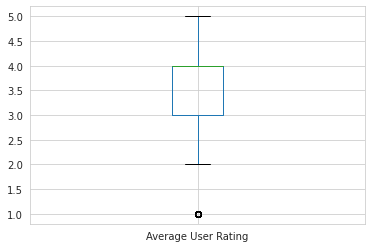

In [464]:
games_df.boxplot(column= 'Average User Rating')

<AxesSubplot:>

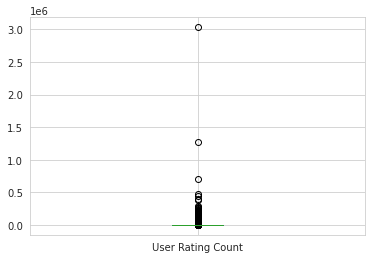

In [465]:
games_df.boxplot(column= 'User Rating Count')

For example, the user rating count column definitely needs scaling, there are many outliers including an extreme one (the 3 million reviews "Clash of Clans" game).

<AxesSubplot:>

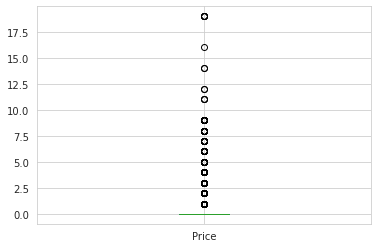

In [181]:
games_df.boxplot(column= 'Price')

<AxesSubplot:>

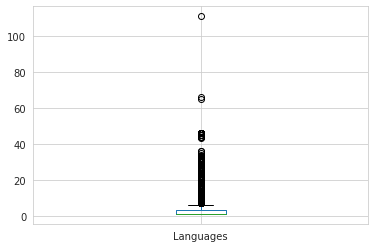

In [466]:
games_df.boxplot(column= 'Languages')

<AxesSubplot:>

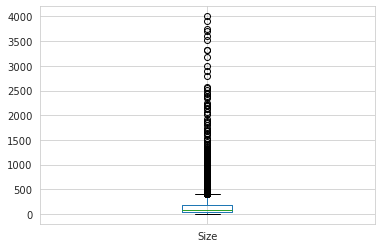

In [467]:
games_df.boxplot(column= 'Size')

Now that we know for certain that we need scaling, we can go on with the process. For this application, we will the standardization technique over normalization, as the latter is more suited for image processing and neural networks.

In [468]:
from sklearn.preprocessing import StandardScaler

In [469]:
scaler = StandardScaler()

In [470]:
games_df[["User Rating Count","Price",
          "Languages","Size"]] = scaler.fit_transform(games_df[[
    "User Rating Count","Price","Languages","Size"]])

In [471]:
games_df

,Average User Rating,User Rating Count,Price,In-app Purchases,Entirely Free,Languages,Size,Age Rating_12,Age Rating_17,Age Rating_4,Age Rating_9
0,4,0.003968,1.194528,0,0,2.002730,-0.534967,0,0,1,0
1,3,-0.071658,0.459692,0,0,-0.435409,-0.546552,0,0,1,0
2,3,0.115545,-0.275144,0,1,-0.435409,-0.592892,0,0,1,0
3,3,4.326401,-0.275144,0,1,2.002730,-0.511796,0,0,1,0
4,3,-0.077580,1.194528,0,0,1.697963,-0.461595,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7214,3,-0.078089,-0.275144,0,1,-0.283026,-0.009780,1,0,0,0
7215,5,-0.077534,-0.275144,0,1,-0.435409,-0.287820,0,0,1,0
7216,5,-0.077048,-0.275144,0,1,-0.435409,-0.110183,0,0,0,1
7217,5,-0.078112,-0.275144,0,1,-0.435409,-0.098598,0,0,1,0


## 5.2: <a class="anchor" id="section_5_2"></a> Splitting the Data

We now move on to the splitting procedure of our data, crucial to estimate the performance of our machine learning algorithms.

In [472]:
# Train Test Split
X = games_df.drop("Average User Rating",axis=1)
y = games_df['Average User Rating']

In [473]:
X_train, X_test, y_train, y_test= train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)

In [474]:
print(len(X_train), " train observations +", len(X_test), "test observations")

4620  train observations + 1444 test observations


## 5.3: <a class="anchor" id="section_5_3"></a> Models Training and Validation

### Naive Bayes Model

In [475]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [525]:
y_pred = gnb.predict(X_test)

In [476]:
print("Accuracy:",gnb.accuracy_score(y_test, y_pred))
print("Precision score: ", gnb.precision_score(y_test, y_pred, average="micro"))
print("Cross-validation score: ", cross_val_score(svm_clf, X_train, y_train, cv=5).mean())

Accuracy: 0.13157894736842105
Precision score:  0.13157894736842105
Cross-validation score:  0.6088744588744589


### Support Vector Classifier

In [121]:
from sklearn.svm import SVC

In [516]:
svc_clf = SVC(gamma='auto',random_state=88)
svc_clf.fit(X_train, y_train)

SVC(C=0.1, gamma=1, random_state=88)

In [517]:
y_pred = svc_clf.predict(X_test)

In [518]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision score: ", metrics.precision_score(y_test, y_pred, average="micro"))
print("Cross-validation score: ", cross_val_score(svc_clf, X_train, y_train, cv=5).mean())

Accuracy: 0.6080332409972299
Precision score:  0.6080332409972299
Cross-validation score:  0.6088744588744589


### Decision Tree Classifier

In [126]:
from sklearn import tree

In [489]:
dt_clf = tree.DecisionTreeClassifier(random_state=88)
dt_clf = dt_clf.fit(X_train, y_train)

In [490]:
y_pred = dt_clf.predict(X_test)

In [491]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision score: ", metrics.precision_score(y_test, y_pred, average="micro"))
print("Cross-validation score: ", cross_val_score(dt_clf, X_train, y_train, cv=5).mean())

Accuracy: 0.4840720221606648
Precision score:  0.4840720221606648
Cross-validation score:  0.45346320346320346


### Random Forest Classifier

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [486]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1, random_state=88)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_jobs=-1, random_state=88)

In [487]:
y_pred_rf = rnd_clf.predict(X_test)

In [488]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision score: ", metrics.precision_score(y_test, y_pred, average="micro"))
print("Cross-validation score: ", cross_val_score(rnd_clf, X_train, y_train, cv=5).mean())

Accuracy: 0.4646814404432133
Precision score:  0.4646814404432133
Cross-validation score:  0.6103896103896105


### XGBoost

In [164]:
import xgboost

In [165]:
from xgboost import XGBClassifier

In [529]:
xgb_clf = XGBClassifier(random_state=88,learning_rate = 0.01,
                        max_depth=4, n_estimators=200)
xgb_clf.fit(X_train, y_train)

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[00:42:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=88, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [530]:
y_pred = xgb_clf.predict(X_test)

In [531]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision score: ", metrics.precision_score(y_test, y_pred, average="micro"))

Accuracy: 0.6059556786703602
Precision score:  0.6059556786703602


### KNN Classifier

In [257]:
from sklearn.neighbors import KNeighborsClassifier

In [499]:
knn = KNeighborsClassifier(n_neighbors = 3,
                           weights = 'uniform', n_jobs=-1,
                           p = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, p=5)

In [500]:
y_pred = knn.predict(X_test)

In [262]:
from sklearn import metrics

In [501]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision score: ", metrics.precision_score(y_test, y_pred, average="micro"))
print("Cross-validation score: ", cross_val_score(knn, X_train, y_train, cv=5).mean())

Accuracy: 0.5006925207756233
Precision score:  0.5006925207756233
Cross-validation score:  0.4798701298701299


In [293]:
from sklearn.metrics import precision_score

# Chapter 6: <a class="anchor" id="chapter6"></a> Fine-tuning the Model

## 6.1: <a class="anchor" id="section_6_1"></a> Grid Search Cross-Validation

In this first part of fine-tuning, we will use the Grid Search CV method, which looks at each combination of parameters given on a model and runs them in order to find the best one. We will use this method on our two models: SVC with 60% accuracy and XGBoost Classifier with 58%.

In [509]:
from sklearn.model_selection import GridSearchCV

In [510]:
from sklearn.metrics import classification_report, confusion_matrix

### GridSearchCV on Support Vector Classifier

In [511]:
param_grid_svc = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid_svc = GridSearchCV(SVC(), param_grid_svc, refit = True, verbose = 3)

grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.4s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.4s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.4s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.4s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.4s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   1.1s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [512]:
# print best parameters after search
print(grid_svc.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [513]:
# print how our model looks after hyper-parameter tuning
print(grid_svc.best_estimator_)

SVC(C=0.1, gamma=1)


### GridSearchCV on XGBoost Classifier

In [523]:
param_grid_xgb = {
    'max_depth': [2,4,6],
    'n_estimators': [50,100,200],
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_xgb = GridSearchCV(XGBClassifier(bjective= 'binary:logistic',
    nthread=4,
    seed=42), param_grid_xgb, refit = True, verbose = 3,
    n_jobs = 10)

grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/opt/anaconda/envs/Python3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[00:06:37] WARNING: ../src/learner.cc:576: 
Parameters: { "bjective" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:06:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None,
                                     bjective='binary:logistic', booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
             

In [526]:
print(grid_xgb.best_params_)

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}


In [527]:
# print how our model looks after hyper-parameter tuning
print(grid_xgb.best_estimator_)

XGBClassifier(base_score=0.5, bjective='binary:logistic', booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, seed=42,
              subsample=1, tree_method='exact', ...)


In [537]:
grid_predictions_xgb = grid_xgb.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions_xgb))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        88
           3       0.32      0.05      0.08       275
           4       0.63      0.96      0.76       878
           5       0.34      0.11      0.16       190

    accuracy                           0.61      1444
   macro avg       0.26      0.22      0.20      1444
weighted avg       0.49      0.61      0.50      1444



In [536]:
import warnings
warnings.filterwarnings("ignore")

## 6.2: <a class="anchor" id="section_6_2"></a> Ensemble Method

Another fine-tuning technique is the use of ensembles, which combine the estimators of several base estimators. We will use the random forest classifier that gathers multiple decision trees and uses averaging for better accuracy and prevention of over-fitting (which can happen easily with decision trees). 

### Ensemble Random Forest Classifier

In [282]:
from sklearn.ensemble import RandomForestClassifier

In [505]:
ens_clf = RandomForestClassifier(max_depth=2, random_state=88)
ens_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=88)

In [506]:
from sklearn.model_selection import cross_val_score

In [507]:
y_pred = ens_clf.predict(X_test)

In [508]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision score: ", metrics.precision_score(y_test, y_pred, average="micro"))
print("Cross-validation score: ", cross_val_score(ens_clf, X_train, y_train, cv=5).mean())

Accuracy: 0.6080332409972299
Precision score:  0.6080332409972299
Cross-validation score:  0.6088744588744589


As expected, the ensemble method performs better than the normal random forest classifier, from 46% to 60% in accuracy.

# Chapter 7: <a class="anchor" id="chapter7"></a> Final Solution and Summary Conclusions

Thanks to the grid search CV, we now have the optimal parameters for two of our models. We will finally proceed and use them to predict and see if our accuracy has improved.

In [514]:
grid_predictions_svc = grid_svc.predict(X_test)
 
# print classification report of predictions
print(classification_report(y_test, grid_predictions_svc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        88
           3       0.00      0.00      0.00       275
           4       0.61      1.00      0.76       878
           5       0.00      0.00      0.00       190

    accuracy                           0.61      1444
   macro avg       0.12      0.20      0.15      1444
weighted avg       0.37      0.61      0.46      1444



/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# References <a class="anchor" id="References"></a>

* Kaser, R. (2021). Newzoo: Mobile gaming accounts for the largest part of the 2021 market. [online] VentureBeat. Available at: https://venturebeat.com/2021/12/22/newzoo-mobile-gaming-accounts-for-the-largest-part-of-the-2021-market/ [Accessed 1 Mar. 2022].

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
import pandas as pd

In [11]:
v = pd.DataFrame(iris.feature_names, column=["feature"])

TypeError: __init__() got an unexpected keyword argument 'column'

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
feature_names

NameError: name 'feature_names' is not defined

# CODING GRAVEYARD

In [ ]:
# create separate year, month, day for original release date and current version release date
games_num['Original Year'] = games_num['Original Release Date'].dt.year
games_num['Original Month'] = games_num['Original Release Date'].dt.month

games_num['Current Year'] = games_num['Current Version Release Date'].dt.year
games_num['Current Month'] = games_num['Current Version Release Date'].dt.month

In [573]:
# Loading one hot encoder
OH_encoder = OneHotEncoder()

In [128]:
# Loading ordinal encoder
ordinal_encoder = OrdinalEncoder()

In [129]:
# Subsetting the Average User Rating column
aur = games[["Average User Rating"]]

In [130]:
aur.head()

,Average User Rating
0,4.0
1,3.5
2,3.0
3,3.5
4,3.5


In [131]:
aur_encoded = ordinal_encoder.fit_transform(aur)

In [132]:
aur_encoded[:10]

array([[6.],
       [5.],
       [4.],
       [5.],
       [5.],
       [4.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [133]:
# Showing categories encoded
ordinal_encoder.categories_

[array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])]

<font color='grey'>_Ordinal Encoding Age Rating_</font>

In [134]:
# Subsetting the Age Rating column
ar = games[["Age Rating"]]

In [135]:
ar.head()

,Age Rating
0,4
1,4
2,4
3,4
4,4


In [136]:
ar_encoded = ordinal_encoder.fit_transform(ar)

In [137]:
ar_encoded[:10]

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [138]:
ordinal_encoder.categories_

[array(['12', '17', '4', '9'], dtype=object)]

In [585]:
games_num = games.copy()

In [571]:
imputer = SimpleImputer(strategy='most_frequent')
games_imp = pd.DataFrame(imputer.fit_transform(games_test))
games_imp.columns = games_test.columns

OH_cols_test = pd.DataFrame(OH_encoder.fit_transform(games_imp[['Age Rating','Genres']]))

OH_cols_test.index = games_imp.index

num_X_test = games_imp.drop(['Age Rating','Genres'], axis=1)

OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [73]:
df_2 = df_2.reset_index(drop=True)

<AxesSubplot:>

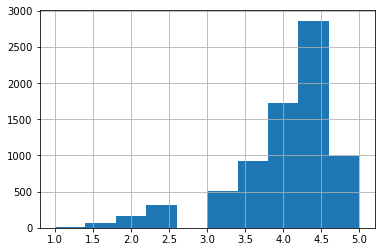

In [76]:
games["Average User Rating"].hist()

In [13]:
corr_matrix = games.corr()
corr_matrix["Average User Rating"].sort_values(ascending=False)

Average User Rating    1.000000
ID                     0.210280
Size                   0.061617
User Rating Count      0.033025
Price                 -0.000414
Name: Average User Rating, dtype: float64

In [52]:
# Creating a copy of our data for exploratory purposes
df_ex = games.copy()

games_2 = games.copy()

#Prepare dataframe for plotting
games_2_price = games_2.loc[games_2['Price'].notnull()].reset_index()
games_2_price['paid | free']=0

for i in range(len(games_2_price['Price'])):
    if games_2_price['Price'][i] > 0:
        games_2_price['paid | free'][i] = 'pay-to-play'
    else:
        games_2_price['paid | free'][i] = 'free-to-play'
        
games_2_price_pie = pd.DataFrame(games_2_price['paid | free'].value_counts()).reset_index()
games_2_price_pie.columns = ['paid | free', 'count']

### Stats

In [108]:
#Statistical summary table: Centrality, spread, and shape of numeric distributions
dfstats = df_2.describe()
dfstats.loc["skew",] = df_2.skew(axis = 0, skipna = True)
dfstats.loc["kurtosis",] = df_2.kurtosis(axis = 0, skipna = True)
dfstats = dfstats.drop(["count", "min", "25%", "50%", "75%", "max"])
dfstats.index = ["Mean", "Standard deviation", "Skew", "Kurtosis"]
dfstats.round(1)

,Average User Rating,User Rating Count,Price,In-app Purchases,Languages,Size
Mean,4.1,3307.7,0.5,0.6,3.8,151.4
Standard deviation,0.8,42330.9,1.6,0.5,6.5,255.1
Skew,-1.2,53.7,4.5,-0.5,3.7,6.4
Kurtosis,1.2,3597.2,28.6,-1.8,21.9,62.4
